# EDA of Lipophilicity.csv

## Summary
1. There are 9549 experimental records
2. Almost half of them were duplicates. 5155 unique records. All of them include pH
3. Almost all of them are neutral (pH in \[6, 8\])
4. There 4929 unique smiles
5. Temperature is not mentioned
6. There were some smiles with multiple records, but big variance. They were dropped. 
7. All in all there are 4981 records left.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

import sys

DATA_PATH = "../data/raw/logd/"

In [2]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [89]:
logd_data = pd.read_csv(DATA_PATH + "logd_ochem_dataset.csv", delimiter=",", low_memory=False)
logd_data.head()

,SMILES,LogD {measured},UNIT {LogD},pH,UNIT {pH},Temperature,UNIT {Temperature},logPow Method,logPow Buffer,Ionic strength,UNIT {Ionic strength},Species,Test duration,Material Nanoparticles of Elements,APS,UNIT {APS},Explosure concentration,UNIT {Explosure concentration},Crystal structure of nanoparticles,Ionisable
0,OCC1CCC(O1)N1C=NC2=C1N=CNC2=O,-0.54,Log unit,7.4,Log unit,37.0,?C,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN
1,CC(C)(C)NC(=O)C1CN(CC2=CN=CC=C2)CCN1CC(O)CC(CC...,2.79,Log unit,7.4,Log unit,37.0,?C,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN
2,CC1=CC=NC2=C1NC(=O)C1=C(N=CC=C1)N2C1CC1,1.81,Log unit,7.4,Log unit,37.0,?C,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN
3,CC1=CN(C2CC(N=[N]#N)C(CO)O2)C(=O)NC1=O,-0.58,Log unit,7.4,Log unit,37.0,?C,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN
4,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,3.48,Log unit,7.4,Log unit,37.0,?C,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN


In [90]:
logd_data = logd_data[['SMILES', 'LogD {measured}', 'pH']]
logd_data.head()

,SMILES,LogD {measured},pH
0,OCC1CCC(O1)N1C=NC2=C1N=CNC2=O,-0.54,7.4
1,CC(C)(C)NC(=O)C1CN(CC2=CN=CC=C2)CCN1CC(O)CC(CC...,2.79,7.4
2,CC1=CC=NC2=C1NC(=O)C1=C(N=CC=C1)N2C1CC1,1.81,7.4
3,CC1=CN(C2CC(N=[N]#N)C(CO)O2)C(=O)NC1=O,-0.58,7.4
4,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,3.48,7.4


In [91]:
logd_data = logd_data.rename(columns={"LogD {measured}": "logD", "SMILES": "smiles"})
logd_data.head()

,smiles,logD,pH
0,OCC1CCC(O1)N1C=NC2=C1N=CNC2=O,-0.54,7.4
1,CC(C)(C)NC(=O)C1CN(CC2=CN=CC=C2)CCN1CC(O)CC(CC...,2.79,7.4
2,CC1=CC=NC2=C1NC(=O)C1=C(N=CC=C1)N2C1CC1,1.81,7.4
3,CC1=CN(C2CC(N=[N]#N)C(CO)O2)C(=O)NC1=O,-0.58,7.4
4,CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...,3.48,7.4


In [92]:
logd_data.shape

(9549, 3)

In [93]:
logd_data = logd_data.drop_duplicates()

In [94]:
logd_data.shape

(5166, 3)

In [95]:
logd_data['smiles'].unique().shape

(4929,)

In [96]:
logd_data['logD'] = pd.to_numeric(logd_data['logD'], errors='coerce')

In [97]:
logd_data = logd_data[logd_data.logD.notnull()]

In [98]:
logd_data.shape

(5155, 3)

In [99]:
grouped_data = logd_data.groupby(['smiles', 'pH']).agg(count_of_records=('logD', 'count'), 
                                       var=('logD', 'var')).sort_values(by=['count_of_records'], ascending=False)
grouped_data.head(20)

,,count_of_records,var
smiles,pH,,
O=[Ti]=O.O=[Ti]=O,5.5,11,492.410545
CN1N(C(=O)C=C1C)C1=CC=CC=C1,7.4,6,0.030745
CN1C2=C(NC=N2)C(=O)N(C)C1=O,7.4,5,0.056250
CC(C)NCC(O)COC1=CC=C(CC(N)=O)C=C1,7.4,5,0.062767
OC[C@@H](NC(=O)C(Cl)Cl)[C@H](O)C1=CC=C(C=C1)[N+]([O-])=O,7.4,4,0.056067
COCCC1=CC=C(OCC(O)CNC(C)C)C=C1,7.4,4,0.098492
CN1C=NC2=C1C(=O)N(C)C(=O)N2C,7.4,4,0.001625
CC(=O)NC1=CC=C(O)C=C1,7.4,4,0.011667
CC(C)(C)NCC(O)C1=CC(O)=CC(O)=C1,7.4,4,0.028200


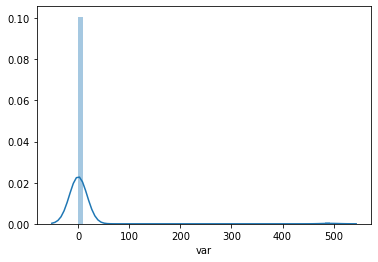

In [100]:
sns.distplot(grouped_data['var'])

In [101]:
grouped_data[grouped_data['var'] > 1]

,,count_of_records,var
smiles,pH,,
O=[Ti]=O.O=[Ti]=O,5.5,11,492.410545
CC(=O)OC1=C(C=CC=C1)C(O)=O,7.4,3,4.345600
CC1=CC=C(C)C(OCCCC(C)(C)C(O)=O)=C1,7.4,2,2.163200
CCC1(C(=O)NC(=O)NC1=O)C1=CC=CC=C1,7.4,2,1.065800
[H]OC(=O)C([H])(N([H])[H])C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H],7.4,2,3.645000


In [104]:
bad_smiles = ['O=[Ti]=O.O=[Ti]=O', 'CC(=O)OC1=C(C=CC=C1)C(O)=O', 'CC1=CC=C(C)C(OCCCC(C)(C)C(O)=O)=C1',
              'CCC1(C(=O)NC(=O)NC1=O)C1=CC=CC=C1', '[H]OC(=O)C([H])(N([H])[H])C([H])([H])C([H])(C([H])([H])[H])C([H])([H])[H]']

In [108]:
logd_data = logd_data[~logd_data.smiles.isin(bad_smiles)]

In [109]:
grouped_data = logd_data.groupby(['smiles', 'pH']).agg(count_of_records=('logD', 'count'), 
                                       var=('logD', 'var')).sort_values(by=['count_of_records'], ascending=False)
grouped_data.head()

,,count_of_records,var
smiles,pH,,
CN1N(C(=O)C=C1C)C1=CC=CC=C1,7.4,6,0.030745
CN1C2=C(NC=N2)C(=O)N(C)C1=O,7.4,5,0.056250
CC(C)NCC(O)COC1=CC=C(CC(N)=O)C=C1,7.4,5,0.062767
CN1C=NC2=C1C(=O)N(C)C(=O)N2C,7.4,4,0.001625
CC(C)(C)NCC(O)C1=CC(O)=CC(O)=C1,7.4,4,0.028200


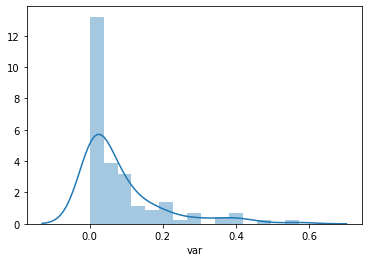

In [110]:
sns.distplot(grouped_data['var'])

In [112]:
logd_data = logd_data.groupby(['smiles', 'pH']).mean().reset_index()
logd_data.head()

,smiles,pH,logD
0,BrC1=C2NC3=C(CN(CC3)C(=O)[C@@H]3CCCC[C@H]3C(=O...,7.4,3.12
1,BrC1=CC(COC[C@@H](N2CCNCC2)C2=CC=CC=C2)=CC(Br)=C1,7.4,2.80
2,BrC1=CC2=C(C=CC=C2)N=C1,7.4,2.91
3,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,7.4,1.38
4,BrC1=CC2=C(NC(=O)CN=C2C2=NC=CC=C2)C=C1,7.4,1.65


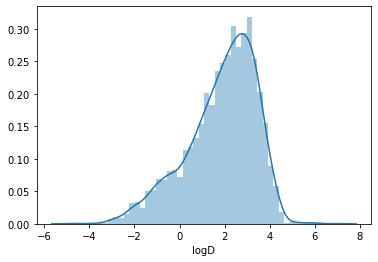

In [113]:
sns.distplot(logd_data.logD)

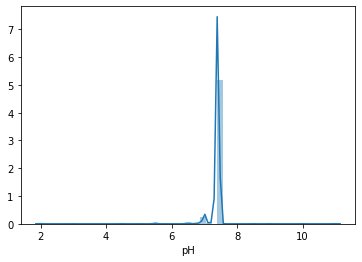

In [118]:
sns.distplot(logd_data.pH)

In [119]:
ranges = [1, 4, 6, 8, 10, 14]
logd_data['pH'].groupby(pd.cut(logd_data['pH'], ranges)).count()

pH
(1, 4]         6
(4, 6]        19
(6, 8]      4947
(8, 10]        6
(10, 14]       3
Name: pH, dtype: int64

In [115]:
print(logd_data.shape)
print(logd_data['smiles'].shape)

(4981, 3)
(4981,)


In [116]:
logd_data.to_csv("../data/1_filtering/logd/logd_ochem_dataset.csv")